# Setup

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Read data

In [2]:
def display_img(img, **kwargs):
    plt.figure()
    plt.imshow(img, **kwargs)
    plt.axis("off")
    print(img.shape)

(2048, 1253, 3)


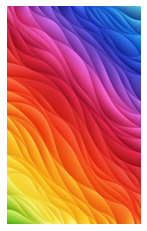

In [3]:
jpg_img = mpimg.imread("colourful.jpg")
display_img(jpg_img)

# Transform data

In [4]:
def rgb888_2_rgb565(img):
    img565 = np.zeros(img.shape[:-1], dtype=np.uint16)
    r = img[:,:,0].astype(np.uint16) >> 3
    g = img[:,:,1].astype(np.uint16) >> 2
    b = img[:,:,2].astype(np.uint16) >> 3
    
    img565 = (r<<11) | (g<<5) | (b<<0)
    
    return img565

In [5]:
def rgb565_2_rgb888(img):
    img888 = np.zeros((*img.shape, 3), dtype=np.uint8)
    img888[:,:,0] = ((img & 0xF800) >> 11) * 255/0x1F
    img888[:,:,1] = ((img & 0x7E0) >> 5) * 255/0x3F
    img888[:,:,2] = ((img & 0x1F) >> 0) * 255/0x1F
    
    return img888

In [6]:
def rgb888_2_gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

In [7]:
img_565 = rgb888_2_rgb565(jpg_img)

In [8]:
img_565.shape

(2048, 1253)

In [9]:
final_img = rgb565_2_rgb888(img_565)

(2048, 1253, 3)


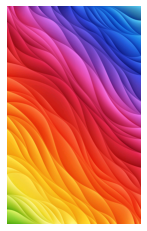

In [10]:
display_img(final_img)

(2048, 1253)


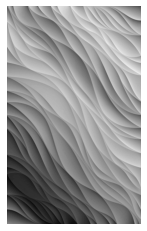

In [11]:
gray_img = rgb888_2_gray(final_img)

display_img(gray_img, cmap="binary")

In [12]:
np.allclose(jpg_img, final_img, rtol=0, atol=7)

True

# Test image from STM32

This was used for testing, I left it in case you may use it for inspiration

In [59]:
with open("img_test.txt") as f:
    str_img_test = f.read()
len(str_img_test.split(","))

76801

In [60]:
img_test = np.array(str_img_test.split(",")[:-1], dtype=np.uint16)

In [61]:
img_test = img_test.reshape(-1,2)
img_test

array([[0x8dad, 0x958e],
       [0x9dae, 0xa5af],
       [0xa5af, 0x9dce],
       ...,
       [0xbe0f, 0xbe10],
       [0xbe10, 0xbdcf],
       [0xb5cf, 0xb5cf]], dtype=uint16)

In [62]:
img_test[:,[0,1]] = img_test[:,[1,0]]
img_test

array([[0x958e, 0x8dad],
       [0xa5af, 0x9dae],
       [0x9dce, 0xa5af],
       ...,
       [0xbe10, 0xbe0f],
       [0xbdcf, 0xbe10],
       [0xb5cf, 0xb5cf]], dtype=uint16)

In [63]:
img_test = img_test.reshape(320,240)

In [64]:
img_test.shape

(320, 240)

In [65]:
img_test_888 = rgb565_2_rgb888(img_test)

(320, 240, 3)


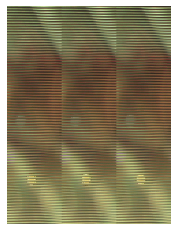

In [66]:
display_img(img_test_888)